#2.  "Anime-dataset-2023.csv"를 활용하여 오타쿠 세대를 6개로 분류하여, 세대별 유명했던 애니메이션(Score, Aired) 종류 및 장르 분석 하여 세대별 TOP5 작품 뽑아내기  
#-> Bar chart on polar axis로 시각화 및  Grouped bar chart with labels로 시각화  
#사용 컬럼 : Aired(전처리 및 열 추가작업 필요), Score, Genres(전처리 필요)  <hr> 

In [7]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기


import SampleData as d # SampleData.py의 변수 사용


font_path=r'c:\WINDOWS\Fonts\H2MJRE.TTF' # 한글 출력 설정
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)

<!-- ①1974~1979 오타쿠 1세대
　장로 세대. 아직 오타쿠라는 말이 존재하지 않는 시대에 이미 오타쿠였다.SF 팬 주체로 그 밖에 만화 팬·애니메이션 팬 등의 집합체.지적 엘리트로 활자에 권위가 있던 시대의 사람. 히라케 세대이지만 아직 정치적 열의가 있는 사람들이기도 하고, 태연자약하다.만일을 위해 밀리터리·철도·모형등은 그야말로 전쟁전부터 계속되고 있는 이른바 오타쿠 제0세대의 취미인 것에 주의. 시치미떼 세대 전반에 해당한다.예, 요네자와 요시히로.
②1980~1988년 오타쿠 2세대
　크리에이터 세대.오타쿠라는 말이 생겨나 코미케가 본격 시동해, 오타쿠가 젊은이의 문화였던 시대.이 시대는 건담이나 스타워즈 등 영상 SF가 강하다.패러디 롤리콘 야오이도 이 무렵부터.이 세대는 밝다.근저에 80년대적인 「밝고 즐겁지 않으면 안 된다」라고 하는 의식이 있다.인터넷이 없어 정보를 수집하거나 동인 작품을 만드는데 사교성·협조성도 필요했다.후의 크리에이터를 만들어내는 모체가 된 시대. 시라케 세대 후반~버블 세대 전반에 해당한다.예: 안노 히데아키(庵野秀明).
③1989년~1999년 오타쿠 3세대
　때리기 세대.전반은 연속 유녀 유괴 살인 사건 때문에 오타쿠 문화는 저조.후반부부터는 에반게리온 등 명작들이 차례로 생겨나 오타쿠 문화의 한 산이 된다.이 세대는 때리기를 받았기 때문에 오타쿠임을 자기 변호할 필요가 있어 오타쿠 평론가의 시대가 됐다.또 이 시대에 「나는 멋쟁이라서 오타쿠가 아니다」라고 주장하는 사람들이 나타나, 오타쿠파와 서브칼파·봉크라파의 대립이 생겨났다.시부야 케이 등 90년대는 서브칼 황금 시대이기도 했다고 말할 수 있다.오타쿠 제3세대는 오타쿠 때리기나 버블 붕괴 후의 세태도 있어 어딘지 모르게 어두움과 성실함을 느끼는 사람들이다.버블 세대 후반빙하기 세대 중반에 해당한다.예: 히가시 히로키.
④2000년~2010년 오타쿠 4세대
　맹아 세대.전차남 등 매스 미디어에서 오타쿠가 붐이 되어, 오타쿠에게 유머러스한 인상이 생겼다.오타쿠=모에·애니메이션 오타쿠라고 하는 이미지가 붙여진 시대.인터넷이 본격적으로 보급되면서 익명 게시판의 영향력이 강해 지식이 없어도 커뮤니티에 들어가지 못하고도 덕후가 될 수 있게 됐다.전반은 성인 게임, 후반은 라이트 노벨이 인기 콘텐츠였다.
　나, 전 오타는 제4세대에 해당하지만, 이 세대는 인터넷이 단번에 보급되었기 때문에 인터넷으로 작품을 발표하는 사람도 많아, 오카다가 말하는 것처럼 크리에이터 지향이 약했다고는 생각되지 않는다.그러나 단번에 덕후들의 저변이 넓어졌으니 얕은 놈 무식한 놈은 많아진 것은 사실일 것이다.실제 체험으로서 제4세대는 안 되는 인간 모두가 심야 애니메이션이나 게임을 통해서 낭비하고 있는 인상이 있다.제4세대는 인터넷적인 바보 같은 밝음을 느끼는 세대다.빙하기 세대 후반~프레셔 세대가 해당하지만, 이 이후는 넷의 시대가 되었기 때문에 연령은 별로 관계 없게 되어 간다.제4세대 이후는 빙하기 세대~유토리 세대까지 골고루 해당한다고 생각하는 것이 좋을지도 모른다.예: 쇼코탄.
⑤2011년~2019년 오타쿠 5세대
　추대하는 세대.지진 재해등에 의한 사회 불안이 원인일지도 모르지만, 이 시기에 아이돌 붐이 발생해 아이돌 덕후가 애니메이션과 나란히 하는 덕후 문화의 2대 중심지가 된다.애니메이션에서도 아이돌물이 붐이 되거나 소셜 게임이 보급되는 등, 특정의 캐릭터를 응원하는 것이 오타쿠의 기본 자세가 되어, 모에 문화는 추천 문화로 대체되었다.또 '너의 이름은' 등 애니메이션 영화가 특대 히트를 치면서 일반인들의 덕후화가 꾸준히 진행됐다.제5세대 후반에는 오타쿠에 대한 편견은 전혀 없고, 서서히 오타쿠 문화가 일본의 자랑이 되어 간다.5세대부터는 여성 덕후들이 전면에 나서게 되면서 상대적으로 남성 덕후들은 그림자가 드리워졌다.
　과거 세대의 덕후는 '나만 작품의 장점을 알면 된다'는 자기본위의 세계였다.그러나 제5세대부터는 「누군가를 응원하기 때문에 오타쿠다」라고 하는 상대 본위의 활동으로 변화했다.이것은 바로 코페르니쿠스적 전환으로, 이렇게 덕질이 응원 주체의 문화가 되었기 때문에 사회에 받아들여졌을 것이라고 생각한다.하지만 그 대가로 '덕후니까 지식이 없으면 안 된다'는 공통 인식이 완전히 상실됐고, 얼마나 억지로 돈을 쓰느냐가 위대함으로 이어지는 배금주의 세계로 돌입했다.
　이 시대는 SNS가 보급되었기 때문에 SNS를 통해 오타 동료와 연결되게 되었다.그 결과 오타쿠 활동에 국한되지 않고 타인과의 거리감에 시달리는 시대가 됐다.인상론으로 미안하지만 5세대는 농담이 통하지 않는 사람들이라는 인상이 있다.예:특별히 없음.5세대는 '응원'이기 때문에 자신이 주체가 되지 못한다.
⑥2020~현재 오타쿠 6세대
　코로나 사태로 온 국민이 자숙을 피할 수 없게 되는 가운데 「귀멸의 칼날」이 공전의 히트가 되었다.이 시대 오타쿠의 비율이 40세 이하의 절반가량에 달했다.따라서, 더 이상 오타쿠가 뭔가 특정한 특징을 가지는 집단을 나타내는 말이 아니게 되어, 「오타쿠」라고 하는 개념이 소멸해 가고 있는 세대이다.이 세대의 오타쿠는 보통 사람, 그것에 불과하다.일본인이라면 애니메이션 영화를 보고, 소셜 게임을 하고, 스포츠의 일본 대표를 응원하는, 보통 사람의 생활로서 오타쿠를 하고 있는 사람.오타쿠라는 말에 긍정적 이미지가 있는 세대로 '오타쿠=사회부적합자'라는 정의는 소멸됐다.예: 당신 주위에 있는 보통 사람. -->

In [8]:
'''
①1974~1979 오타쿠 1세대
　장로 세대. 아직 오타쿠라는 말이 존재하지 않는 시대에 이미 오타쿠였다.SF 팬 주체로 그 밖에 만화 팬·애니메이션 팬 등의 집합체.지적 엘리트로 활자에 권위가 있던 시대의 사람. 히라케 세대이지만 아직 정치적 열의가 있는 사람들이기도 하고, 태연자약하다.만일을 위해 밀리터리·철도·모형등은 그야말로 전쟁전부터 계속되고 있는 이른바 오타쿠 제0세대의 취미인 것에 주의. 시치미떼 세대 전반에 해당한다.예, 요네자와 요시히로.
②1980~1988년 오타쿠 2세대
　크리에이터 세대.오타쿠라는 말이 생겨나 코미케가 본격 시동해, 오타쿠가 젊은이의 문화였던 시대.이 시대는 건담이나 스타워즈 등 영상 SF가 강하다.패러디 롤리콘 야오이도 이 무렵부터.이 세대는 밝다.근저에 80년대적인 「밝고 즐겁지 않으면 안 된다」라고 하는 의식이 있다.인터넷이 없어 정보를 수집하거나 동인 작품을 만드는데 사교성·협조성도 필요했다.후의 크리에이터를 만들어내는 모체가 된 시대. 시라케 세대 후반~버블 세대 전반에 해당한다.예: 안노 히데아키(庵野秀明).
③1989년~1999년 오타쿠 3세대
　때리기 세대.전반은 연속 유녀 유괴 살인 사건 때문에 오타쿠 문화는 저조.후반부부터는 에반게리온 등 명작들이 차례로 생겨나 오타쿠 문화의 한 산이 된다.이 세대는 때리기를 받았기 때문에 오타쿠임을 자기 변호할 필요가 있어 오타쿠 평론가의 시대가 됐다.또 이 시대에 「나는 멋쟁이라서 오타쿠가 아니다」라고 주장하는 사람들이 나타나, 오타쿠파와 서브칼파·봉크라파의 대립이 생겨났다.시부야 케이 등 90년대는 서브칼 황금 시대이기도 했다고 말할 수 있다.오타쿠 제3세대는 오타쿠 때리기나 버블 붕괴 후의 세태도 있어 어딘지 모르게 어두움과 성실함을 느끼는 사람들이다.버블 세대 후반빙하기 세대 중반에 해당한다.예: 히가시 히로키.
④2000년~2010년 오타쿠 4세대
　맹아 세대.전차남 등 매스 미디어에서 오타쿠가 붐이 되어, 오타쿠에게 유머러스한 인상이 생겼다.오타쿠=모에·애니메이션 오타쿠라고 하는 이미지가 붙여진 시대.인터넷이 본격적으로 보급되면서 익명 게시판의 영향력이 강해 지식이 없어도 커뮤니티에 들어가지 못하고도 덕후가 될 수 있게 됐다.전반은 성인 게임, 후반은 라이트 노벨이 인기 콘텐츠였다.
　나, 전 오타는 제4세대에 해당하지만, 이 세대는 인터넷이 단번에 보급되었기 때문에 인터넷으로 작품을 발표하는 사람도 많아, 오카다가 말하는 것처럼 크리에이터 지향이 약했다고는 생각되지 않는다.그러나 단번에 덕후들의 저변이 넓어졌으니 얕은 놈 무식한 놈은 많아진 것은 사실일 것이다.실제 체험으로서 제4세대는 안 되는 인간 모두가 심야 애니메이션이나 게임을 통해서 낭비하고 있는 인상이 있다.제4세대는 인터넷적인 바보 같은 밝음을 느끼는 세대다.빙하기 세대 후반~프레셔 세대가 해당하지만, 이 이후는 넷의 시대가 되었기 때문에 연령은 별로 관계 없게 되어 간다.제4세대 이후는 빙하기 세대~유토리 세대까지 골고루 해당한다고 생각하는 것이 좋을지도 모른다.예: 쇼코탄.
⑤2011년~2019년 오타쿠 5세대
　추대하는 세대.지진 재해등에 의한 사회 불안이 원인일지도 모르지만, 이 시기에 아이돌 붐이 발생해 아이돌 덕후가 애니메이션과 나란히 하는 덕후 문화의 2대 중심지가 된다.애니메이션에서도 아이돌물이 붐이 되거나 소셜 게임이 보급되는 등, 특정의 캐릭터를 응원하는 것이 오타쿠의 기본 자세가 되어, 모에 문화는 추천 문화로 대체되었다.또 '너의 이름은' 등 애니메이션 영화가 특대 히트를 치면서 일반인들의 덕후화가 꾸준히 진행됐다.제5세대 후반에는 오타쿠에 대한 편견은 전혀 없고, 서서히 오타쿠 문화가 일본의 자랑이 되어 간다.5세대부터는 여성 덕후들이 전면에 나서게 되면서 상대적으로 남성 덕후들은 그림자가 드리워졌다.
　과거 세대의 덕후는 '나만 작품의 장점을 알면 된다'는 자기본위의 세계였다.그러나 제5세대부터는 「누군가를 응원하기 때문에 오타쿠다」라고 하는 상대 본위의 활동으로 변화했다.이것은 바로 코페르니쿠스적 전환으로, 이렇게 덕질이 응원 주체의 문화가 되었기 때문에 사회에 받아들여졌을 것이라고 생각한다.하지만 그 대가로 '덕후니까 지식이 없으면 안 된다'는 공통 인식이 완전히 상실됐고, 얼마나 억지로 돈을 쓰느냐가 위대함으로 이어지는 배금주의 세계로 돌입했다.
　이 시대는 SNS가 보급되었기 때문에 SNS를 통해 오타 동료와 연결되게 되었다.그 결과 오타쿠 활동에 국한되지 않고 타인과의 거리감에 시달리는 시대가 됐다.인상론으로 미안하지만 5세대는 농담이 통하지 않는 사람들이라는 인상이 있다.예:특별히 없음.5세대는 '응원'이기 때문에 자신이 주체가 되지 못한다.
⑥2020~현재 오타쿠 6세대
　코로나 사태로 온 국민이 자숙을 피할 수 없게 되는 가운데 「귀멸의 칼날」이 공전의 히트가 되었다.이 시대 오타쿠의 비율이 40세 이하의 절반가량에 달했다.따라서, 더 이상 오타쿠가 뭔가 특정한 특징을 가지는 집단을 나타내는 말이 아니게 되어, 「오타쿠」라고 하는 개념이 소멸해 가고 있는 세대이다.이 세대의 오타쿠는 보통 사람, 그것에 불과하다.일본인이라면 애니메이션 영화를 보고, 소셜 게임을 하고, 스포츠의 일본 대표를 응원하는, 보통 사람의 생활로서 오타쿠를 하고 있는 사람.오타쿠라는 말에 긍정적 이미지가 있는 세대로 '오타쿠=사회부적합자'라는 정의는 소멸됐다.예: 당신 주위에 있는 보통 사람.
 '''

"\n①1974~1979 오타쿠 1세대\n\u3000장로 세대. 아직 오타쿠라는 말이 존재하지 않는 시대에 이미 오타쿠였다.SF 팬 주체로 그 밖에 만화 팬·애니메이션 팬 등의 집합체.지적 엘리트로 활자에 권위가 있던 시대의 사람. 히라케 세대이지만 아직 정치적 열의가 있는 사람들이기도 하고, 태연자약하다.만일을 위해 밀리터리·철도·모형등은 그야말로 전쟁전부터 계속되고 있는 이른바 오타쿠 제0세대의 취미인 것에 주의. 시치미떼 세대 전반에 해당한다.예, 요네자와 요시히로.\n②1980~1988년 오타쿠 2세대\n\u3000크리에이터 세대.오타쿠라는 말이 생겨나 코미케가 본격 시동해, 오타쿠가 젊은이의 문화였던 시대.이 시대는 건담이나 스타워즈 등 영상 SF가 강하다.패러디 롤리콘 야오이도 이 무렵부터.이 세대는 밝다.근저에 80년대적인 「밝고 즐겁지 않으면 안 된다」라고 하는 의식이 있다.인터넷이 없어 정보를 수집하거나 동인 작품을 만드는데 사교성·협조성도 필요했다.후의 크리에이터를 만들어내는 모체가 된 시대. 시라케 세대 후반~버블 세대 전반에 해당한다.예: 안노 히데아키(庵野秀明).\n③1989년~1999년 오타쿠 3세대\n\u3000때리기 세대.전반은 연속 유녀 유괴 살인 사건 때문에 오타쿠 문화는 저조.후반부부터는 에반게리온 등 명작들이 차례로 생겨나 오타쿠 문화의 한 산이 된다.이 세대는 때리기를 받았기 때문에 오타쿠임을 자기 변호할 필요가 있어 오타쿠 평론가의 시대가 됐다.또 이 시대에 「나는 멋쟁이라서 오타쿠가 아니다」라고 주장하는 사람들이 나타나, 오타쿠파와 서브칼파·봉크라파의 대립이 생겨났다.시부야 케이 등 90년대는 서브칼 황금 시대이기도 했다고 말할 수 있다.오타쿠 제3세대는 오타쿠 때리기나 버블 붕괴 후의 세태도 있어 어딘지 모르게 어두움과 성실함을 느끼는 사람들이다.버블 세대 후반빙하기 세대 중반에 해당한다.예: 히가시 히로키.\n④2000년~2010년 오타쿠 4세대\n\u3000맹아 세대.전차남 등 매스 미디어에서 오타쿠가 붐이 되어,

In [9]:
# 오타쿠 1세대 : 1974~1979 -> 6년
# 오타쿠 2세대 : 1980~1988 -> 9년
# 오타쿠 3세대 : 1989~1999 -> 11년
# 오타쿠 4세대 : 2000~2010 -> 11년
# 오타쿠 5세대 : 2011~2019 -> 10년
# 오타쿠 6세대 : 2020~현재 -> 4년
timestamps = [                  # 오타쿠 세대를 bin 매개변수에 넣어 사용하기 위해 timestamp 데이터 타입 list 생성
    pd.Timestamp("1974-01-01"),
    pd.Timestamp("1980-01-01"),
    pd.Timestamp("1989-01-01"),
    pd.Timestamp("2000-01-01"),
    pd.Timestamp("2011-01-01"),
    pd.Timestamp("2020-01-01"),
    pd.Timestamp("2024-01-01"),
]
otaku_result = d.anime["Start_date"].value_counts(bins=timestamps).sort_values() # 오타쿠 세대별로 카운트값 출력
otaku_result

Start_date
(1973-12-31 23:59:59.999999999, 1980-01-01]     412
(1980-01-01, 1989-01-01]                       1276
(1989-01-01, 2000-01-01]                       2598
(2020-01-01, 2024-01-01]                       3769
(2000-01-01, 2011-01-01]                       5646
(2011-01-01, 2020-01-01]                       9508
Name: count, dtype: int64

In [10]:
otaku_result.index=["1세대","2세대","3세대","4세대","5세대","6세대"] # 오타쿠 인덱스 설정

In [11]:
otaku_result

1세대     412
2세대    1276
3세대    2598
4세대    3769
5세대    5646
6세대    9508
Name: count, dtype: int64

<BarContainer object of 6 artists>

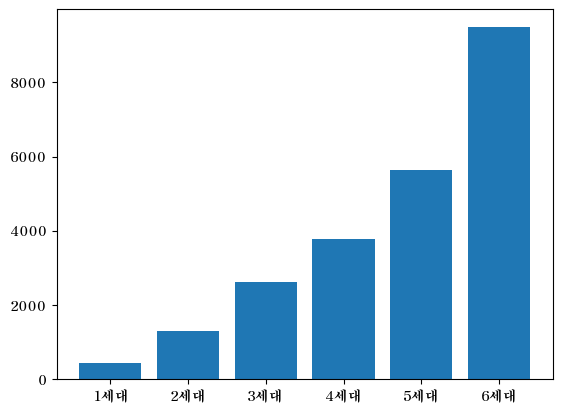

In [12]:
x=otaku_result.index
y=otaku_result.values
plt.bar(x,y)

In [13]:
len(d.anime)

24905

In [14]:
sedai=[[] for _ in range(len(d.anime))] # d.anime에 오타쿠 세대 열(世代)을 추가
for i in range(len(d.anime)) :
    if timestamps[0] <= d.anime.loc[i,"Start_date"] < timestamps[1] : # 오타쿠 1세대 : 1974~1979
        sedai[i]=1
    elif timestamps[1] <= d.anime.loc[i,"Start_date"] < timestamps[2] : # 오타쿠 2세대 : 1980~1988
        sedai[i]=2
    elif timestamps[2] <= d.anime.loc[i,"Start_date"] < timestamps[3] : # 오타쿠 3세대 : 1989~1999
        sedai[i]=3
    elif timestamps[3] <= d.anime.loc[i,"Start_date"] < timestamps[4] : # 오타쿠 4세대 : 2000~2010
        sedai[i]=4
    elif timestamps[4] <= d.anime.loc[i,"Start_date"] < timestamps[5] : # 오타쿠 5세대 : 2011~2019
        sedai[i]=5
    elif timestamps[5] <= d.anime.loc[i,"Start_date"] < timestamps[6] : # 오타쿠 6세대 : 2020~현재
        sedai[i]=6
    else :
        sedai[i]=np.NaN     
d.anime["世代"]=sedai
d.anime.drop(columns=["Start_date","End_date","anime_id","Name","English name", "Favorites","Scored By","Members"],inplace=True, axis="columns")
d.anime["世代"].fillna(0)

0        3.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
24900    6.0
24901    6.0
24902    6.0
24903    6.0
24904    6.0
Name: 世代, Length: 24905, dtype: float64

In [17]:
Sedai_dict_value=[dict() for _ in range(6)]
Sedai_dict_key=list([1,2,3,4,5,6])
Sedai_dict = dict(zip(Sedai_dict_key,Sedai_dict_value))
Sedai_dict

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}}

In [18]:
d.anime["世代"]=d.anime["世代"].fillna(0)

In [19]:
for i in range(d.anime.shape[0]):   # 소속사별당 몇 개의 장르 작업을 했는지 보여줌
    Sedai_key=d.anime[["Genres","世代"]].iloc[i,1]
    Sedai_value=d.anime[["Genres","世代"]].iloc[i,0]
    if Sedai_key :
        for value in Sedai_value.split(", ") :
            if value not in Sedai_dict[Sedai_key] :
                Sedai_dict[Sedai_key].setdefault(value, 1)
            else : # 키값 안에 있다면!
                Sedai_dict[Sedai_key][value]+=1
Sedai_dict

{1: {'Action': 85,
  'Drama': 77,
  'Sci-Fi': 91,
  'Adventure': 104,
  'Romance': 15,
  'Sports': 16,
  'Fantasy': 39,
  'Supernatural': 12,
  'Comedy': 46,
  'Mystery': 10,
  'Award Winning': 7,
  'Slice of Life': 21,
  'UNKNOWN': 99,
  'Suspense': 1,
  'Avant Garde': 18,
  'Horror': 1},
 2: {'Action': 301,
  'Adventure': 298,
  'Horror': 40,
  'Sci-Fi': 314,
  'Supernatural': 41,
  'Drama': 219,
  'Romance': 111,
  'Comedy': 304,
  'Fantasy': 160,
  'Sports': 80,
  'Award Winning': 11,
  'UNKNOWN': 287,
  'Avant Garde': 53,
  'Gourmet': 2,
  'Slice of Life': 73,
  'Mystery': 31,
  'Boys Love': 4,
  'Ecchi': 19,
  'Hentai': 31,
  'Suspense': 1,
  'Girls Love': 1,
  'Erotica': 1},
 3: {'Action': 609,
  'Award Winning': 36,
  'Sci-Fi': 496,
  'Adventure': 644,
  'Fantasy': 578,
  'Avant Garde': 53,
  'Drama': 450,
  'Suspense': 16,
  'Horror': 110,
  'Mystery': 88,
  'Romance': 261,
  'Comedy': 832,
  'Supernatural': 140,
  'Sports': 90,
  'Gourmet': 9,
  'Hentai': 174,
  'Ecchi': 94,


In [20]:
result=pd.DataFrame(Sedai_dict).fillna(0)
result[1]=result[1].astype("int32")
result
# 6,9,11,11,10,4
division_list=[6,9,11,11,10,4]
for i, v in enumerate(division_list) :
    result[i+1]=result[i+1].div(v).round(2)

In [21]:
result.sort_values(by=6,ascending=False,inplace=True) # 오타쿠 세대 별 있는 애니를 장르별로 구분
result.drop("UNKNOWN")

,1,2,3,4,5,6
Fantasy,6.50,17.78,52.55,101.82,204.9,249.75
Comedy,7.67,33.78,75.64,167.36,292.9,230.75
Action,14.17,33.44,55.36,92.91,165.7,207.25
Adventure,17.33,33.11,58.55,86.73,112.8,119.25
Drama,12.83,24.33,40.91,75.55,80.1,81.00
Sci-Fi,15.17,34.89,45.09,76.82,91.4,79.75
Slice of Life,3.50,8.11,12.36,28.55,87.4,74.00
Romance,2.50,12.33,23.73,57.73,70.0,68.50
Supernatural,2.00,4.56,12.73,35.55,61.8,58.25
Hentai,0.00,3.44,15.82,53.82,50.4,45.50


In [62]:
genre_translation = {
    'Comedy': '코미디',
    'Fantasy': '판타지',
    'Action': '액션',
    'Adventure': '모험',
    'Sci-Fi': '과학 소설',
    'Drama': '드라마',
    'Romance': '로맨스',
    'Slice of Life': '일상',
    'Supernatural': '초자연적인',
    'Hentai': '헨타이',
    'Mystery': '미스터리',
    'Avant Garde': '아방가르드',
    'Ecchi': '에치',
    'Sports': '스포츠',
    'Horror': '호러',
    'Suspense': '서스펜스',
    'Award Winning': '수상작',
    'Boys Love': '보이즈 러브',
    'Gourmet': '미식',
    'Girls Love': '걸즈 러브',
    'Erotica': '에로티카',
}


In [45]:
len(genre_translation)

22

In [63]:
values_list=list(genre_translation.values())
values_list

['코미디',
 '판타지',
 '액션',
 '모험',
 '과학 소설',
 '드라마',
 '로맨스',
 '일상',
 '초자연적인',
 '헨타이',
 '미스터리',
 '아방가르드',
 '에치',
 '스포츠',
 '호러',
 '서스펜스',
 '수상작',
 '보이즈 러브',
 '미식',
 '걸즈 러브',
 '에로티카']

0
4
8
12
16
20


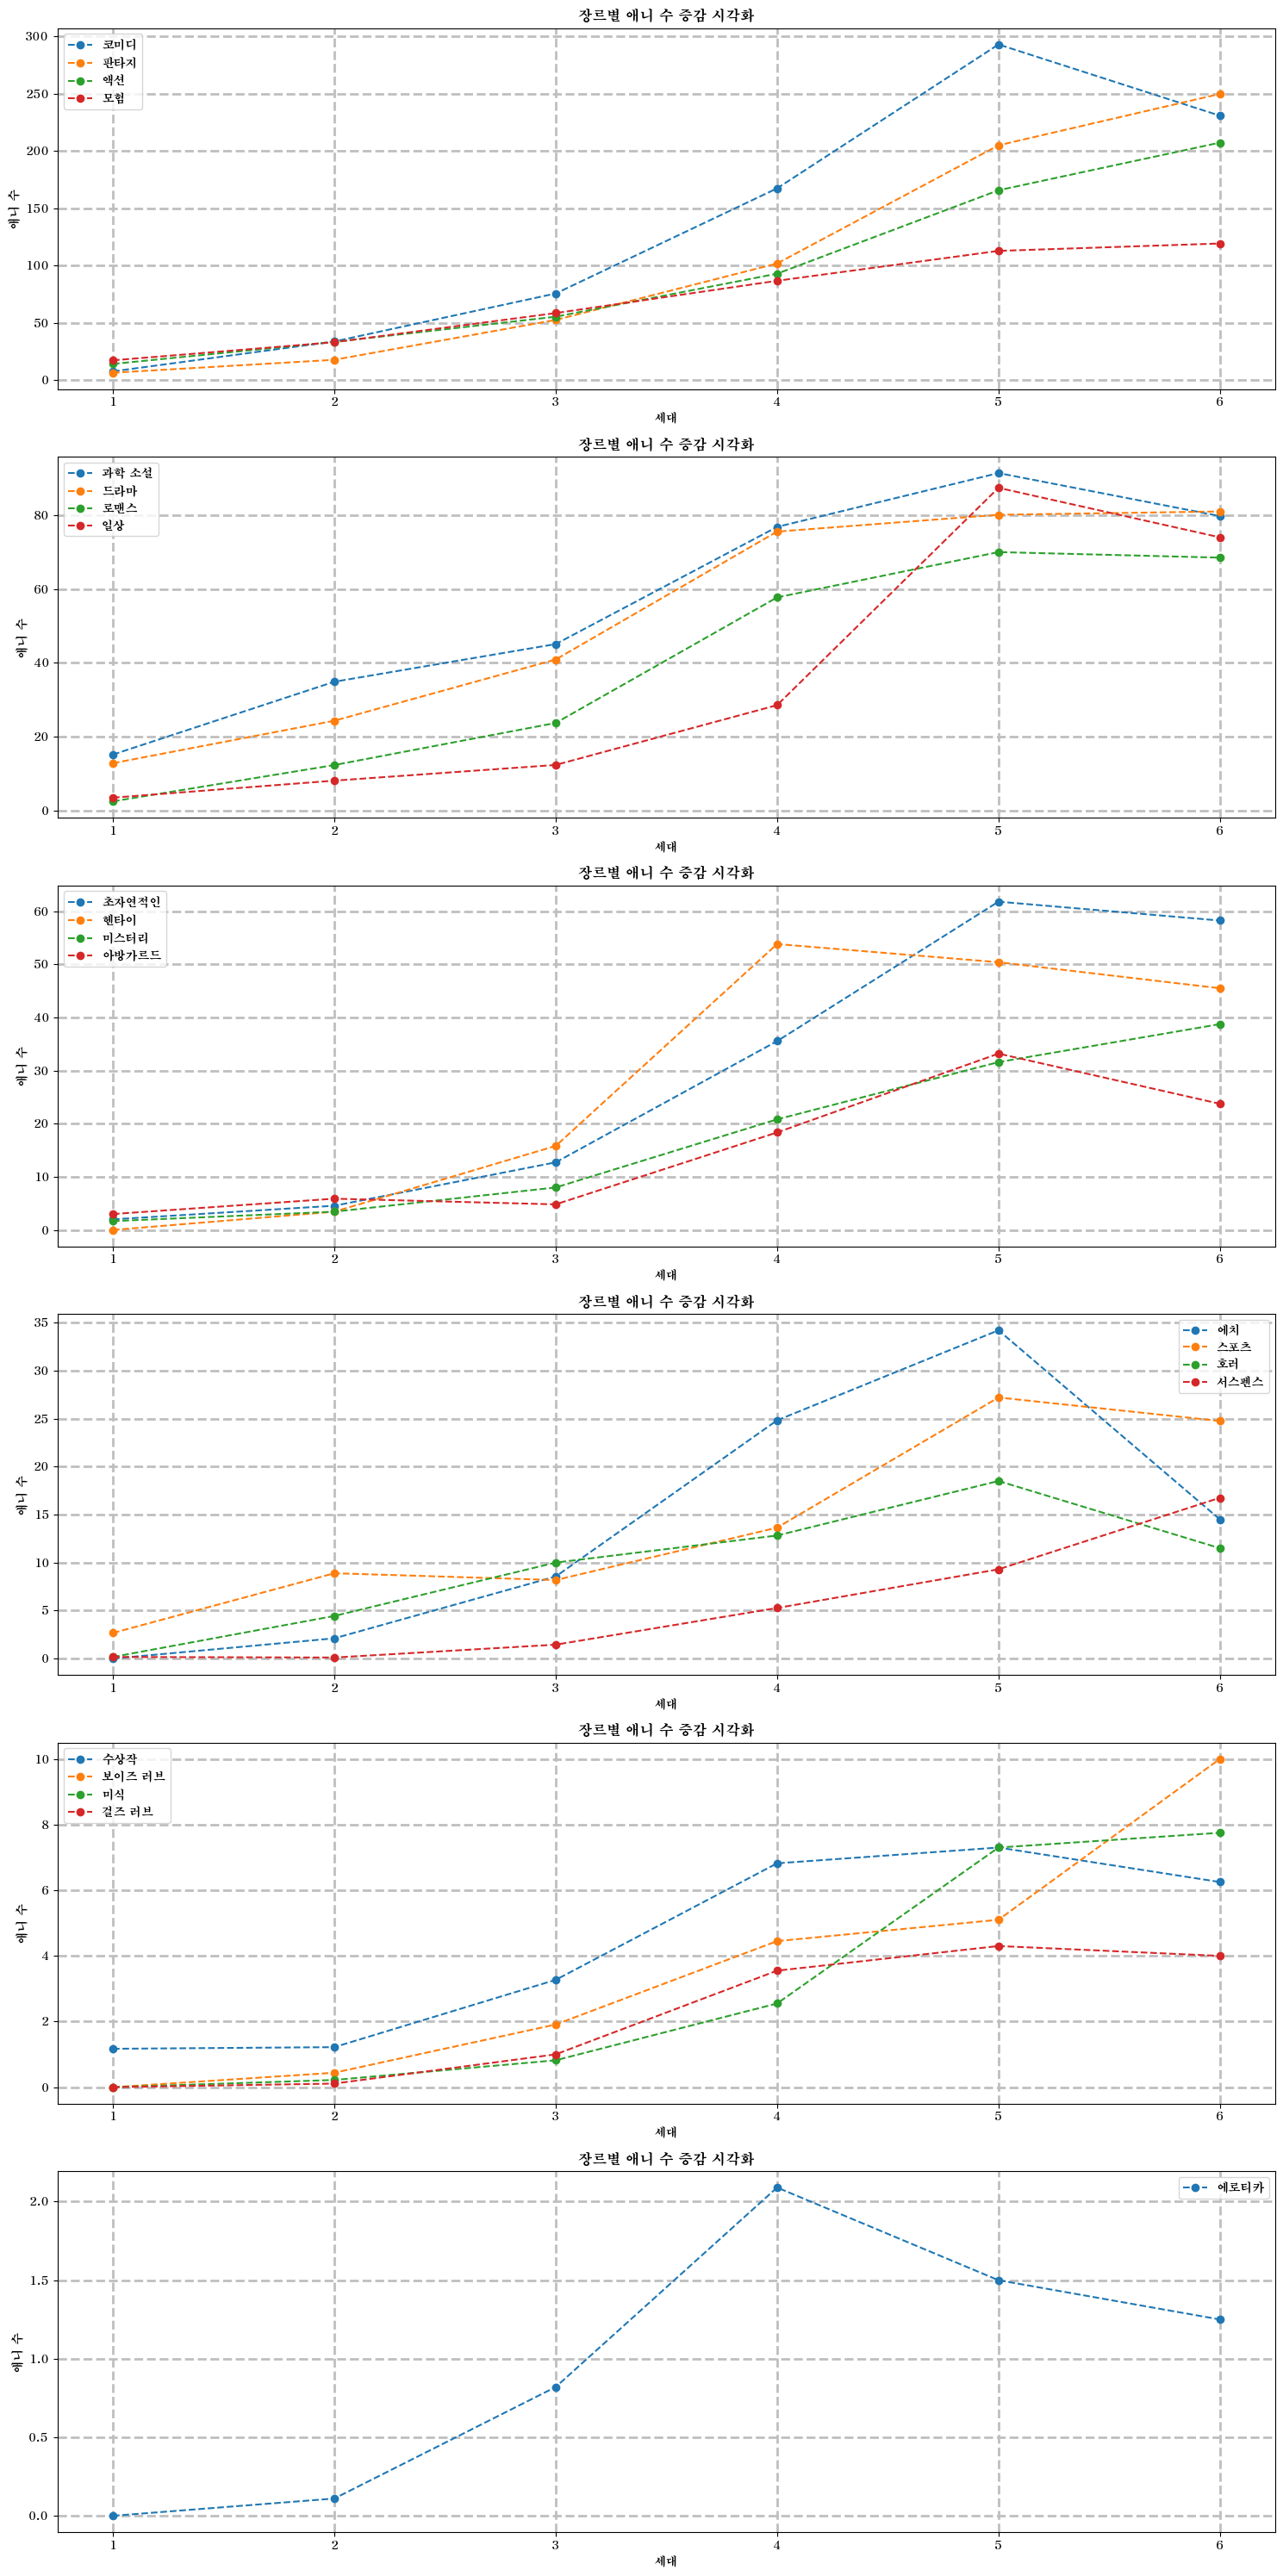

In [76]:
plt.figure(figsize=(15,30))
i=0

for key,value in genre_translation.items() : 
    if not i%4 : 
        print(i)
        plt.subplot(6,1,int(i/4)+1)
    
    x=result.columns.tolist()
    y=result.loc[key].tolist()
    plt.plot(x,y,'o--')
    plt.legend(labels=values_list[0+int(i/4)*4:4+int(i/4)*4])
    i+=1
    
    plt.title(f"장르별 애니 수 증감 시각화")
    plt.grid(True, lw=2, ls='--', c='0.75')
    plt.xlabel("세대")
    plt.ylabel("애니 수")
plt.tight_layout()
plt.show()

In [22]:
#세대별 TOP5작품
for i in range(1,7) :
    sedai=d.anime[d.anime["世代"] == i]
    print(f"오타쿠 {i}세대 상영 시간 통계 보기")
    print(sedai["Duration"].value_counts()) # 3minute인 작품이 점점 많아진다!

오타쿠 1세대 상영 시간 통계 보기
Duration
25 min         68
2 min          57
24 min         49
23 min         11
19 min         10
               ..
1 hr 31 min     1
1 hr 47 min     1
1 hr 28 min     1
1 hr 22 min     1
1 hr 36 min     1
Name: count, Length: 77, dtype: int64
오타쿠 2세대 상영 시간 통계 보기
Duration
25 min         130
24 min         115
2 min          111
23 min          45
10 min          39
              ... 
1 hr 52 min      1
2 hr 28 min      1
2 hr 43 min      1
12 sec           1
18 sec           1
Name: count, Length: 130, dtype: int64
오타쿠 3세대 상영 시간 통계 보기
Duration
25 min         215
24 min         195
30 min         188
2 min          126
23 min         102
              ... 
1 hr 44 min      1
1 hr 53 min      1
1 hr 55 min      1
1 hr 56 min      1
40 sec           1
Name: count, Length: 132, dtype: int64
오타쿠 4세대 상영 시간 통계 보기
Duration
24 min         703
23 min         343
25 min         336
2 min          268
5 min          257
              ... 
2 hr 21 min      1
2 hr 10 min      1


In [23]:
d.anime[["Other name","Image URL","世代","Duration"]][(d.anime["世代"]==3) & (d.anime["Duration"]=="3 min")].iloc[1]
#3분 영상 예시

Other name                                    魔法少女プリティサミー(1996)
Image URL     https://cdn.myanimelist.net/images/anime/4/146...
世代                                                          3.0
Duration                                                  3 min
Name: 1365, dtype: object